<a href="https://www.kaggle.com/code/sonawanelalitsunil/loan-approval-prediction-ml-model?scriptVersionId=203276966" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


# Loan Approval Prediction
*  Problem Statement 
* Hypothesis Generation
* Data Collection
* Exploratory Data Analysis (EDA)
* Data Pre-processing
* Model Development and Evaluation
* Conclusion

##### Problem Statement
Business Problem
"Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers."

 Loan prediction is a very common real-life problem that every retail bank faces in their lending operations. If the loan approval process is automated, it can save a lot of man hours and improve the speed of service to the customers. The increase in customer satisfaction and savings in operational costs are significant. However, the benefits can only be reaped if the bank has a robust model to accurately predict which customer's loan it should approve and which to reject, in order to minimize the risk of loan default.

##### Translate Business Problem into Data Science / Machine Learning problem
This is a classification problem where we have to predict whether a loan will be approved or not. Specifically, it is a binary classification problem where we have to predict either one of the two classes given i.e. approved (Y) or not approved (N). Another way to frame the problem is to predict whether the loan will likely to default or not, if it is likely to default, then the loan would not be approved, and vice versa. The dependent variable or target variable is the Loan_Status, while the rest are independent variable or features. We need to develop a model using the features to predict the target variable.

##### Hypothesis Generation
Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome i.e. which of the features will have an impact on whether a loan will be approved or not. Some of the hypothesis are:

Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval
Income: Applicants with higher income should have more chances of loan approval
Loan amount: If the loan amount is less, the chances of loan approval should be high
Loan term: Loans with shorter time period should have higher chances of approval
Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval
Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high
And so on
Some of the hypothesis seem intuitive while others may not. We will try to validate each of these hypothesis based on the dataset.

### Exploratory Data Analysis (EDA)

In [2]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import median_absolute_error, accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [3]:
# load the train and test dataset
train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

In [4]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()

In [5]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
train.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


In [6]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [7]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((58645, 13), (39098, 12))

In [8]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.5999918152706588, 0.40000818472934124)

In [9]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns, test.columns

(Index(['id', 'person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
        'cb_person_cred_hist_length', 'loan_status'],
       dtype='object'),
 Index(['id', 'person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
        'cb_person_cred_hist_length'],
       dtype='object'))

In [10]:
# show the data types for each column of the train set
train.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

In [11]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

### object:  
Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
int64: It represents the integer variables. ApplicantIncome is of this format.
float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

Why Data Types are important?

Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of analysis.

Univariate analysis

Univariate analysis is when we analyze each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, a histogram or a box-plot can be used to look at the distribution of the variable. With a histogram, you can check the central tendency, variability, modality, and kurtosis of a distribution. Note that a histogram can’t show you if you have any outliers. This is why we also use box-plots.

### Target Variable (Categorical)

In [12]:
# frequency table of a variable will give us the count of each category in that variable
train['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [13]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['cb_person_default_on_file'].value_counts(normalize=True)

cb_person_default_on_file
N    0.851616
Y    0.148384
Name: proportion, dtype: float64

<Axes: xlabel='cb_person_default_on_file'>

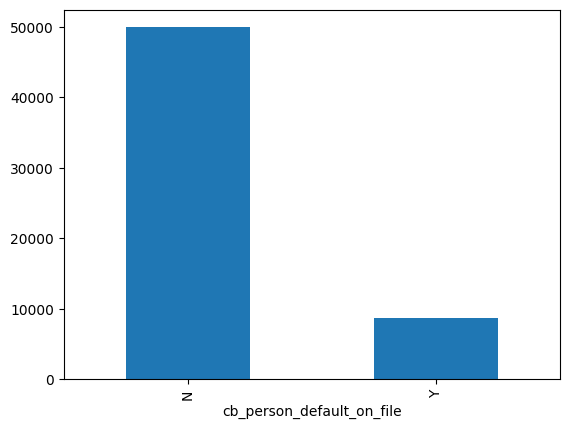

In [14]:
# bar plot to visualize the frequency
train['cb_person_default_on_file'].value_counts().plot.bar()

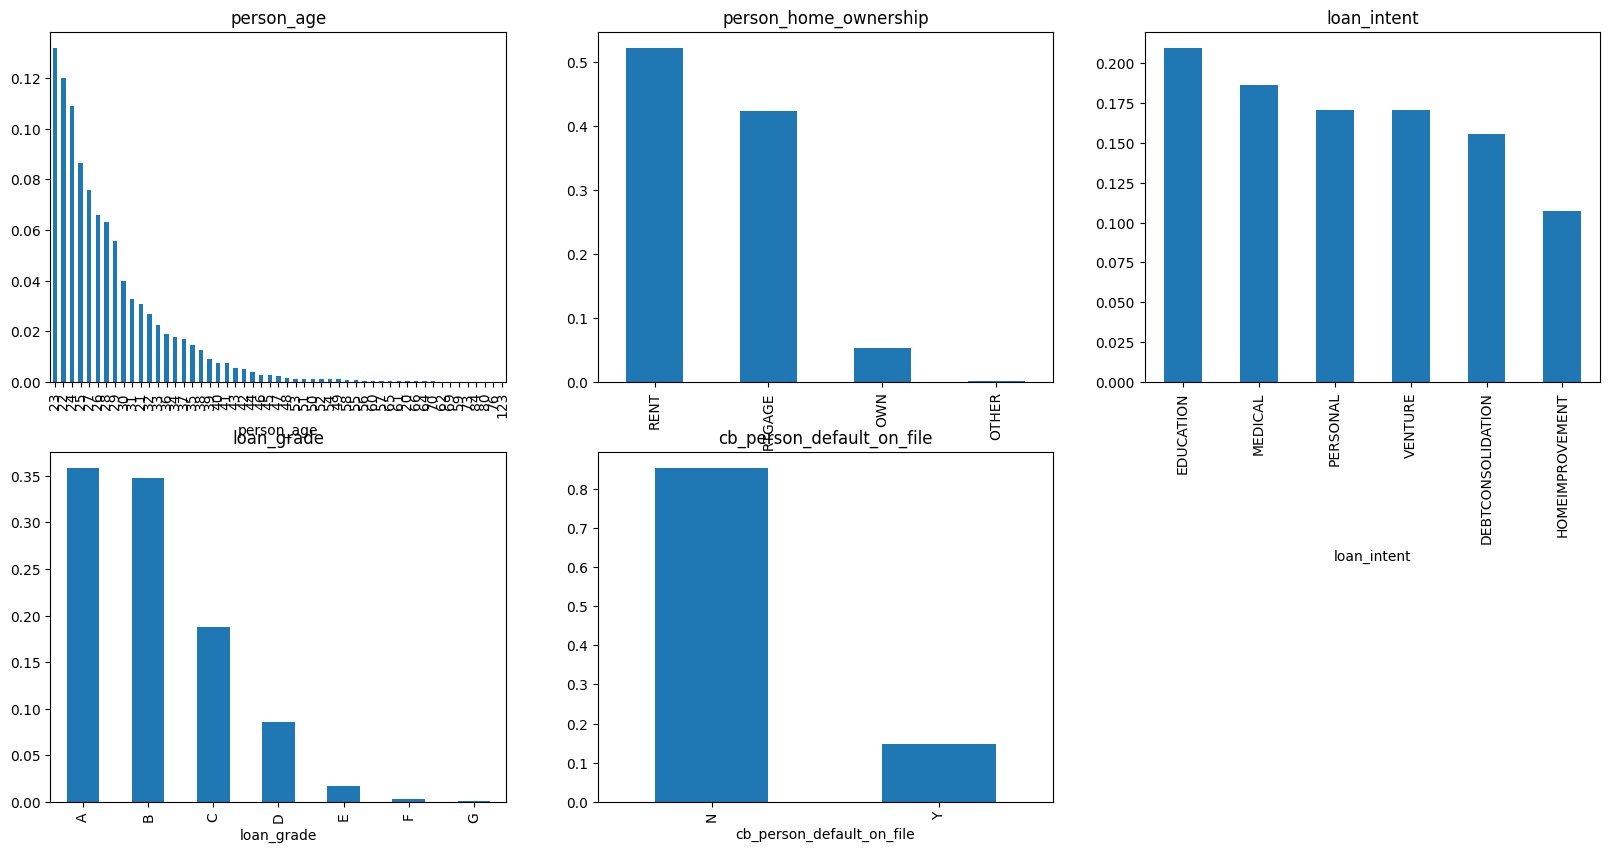

In [15]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['person_age'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'person_age')

plt.subplot(232)
train['person_home_ownership'].value_counts(normalize=True).plot.bar(title= 'person_home_ownership')

plt.subplot(233)
train['loan_intent'].value_counts(normalize=True).plot.bar(title= 'loan_intent')

plt.subplot(234)
train['loan_grade'].value_counts(normalize=True).plot.bar(title= 'loan_grade')

plt.subplot(235)
train['cb_person_default_on_file'].value_counts(normalize=True).plot.bar(title= 'cb_person_default_on_file')

plt.show()

### Independent Variable (Ordinal)

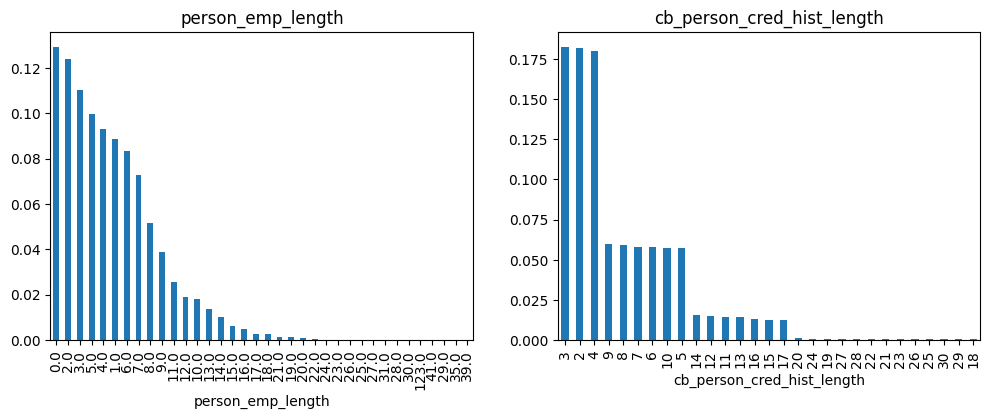

In [16]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['person_emp_length'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'person_emp_length')

plt.subplot(122)
train['cb_person_cred_hist_length'].value_counts(normalize=True).plot.bar(title= 'cb_person_cred_hist_length')

plt.show()

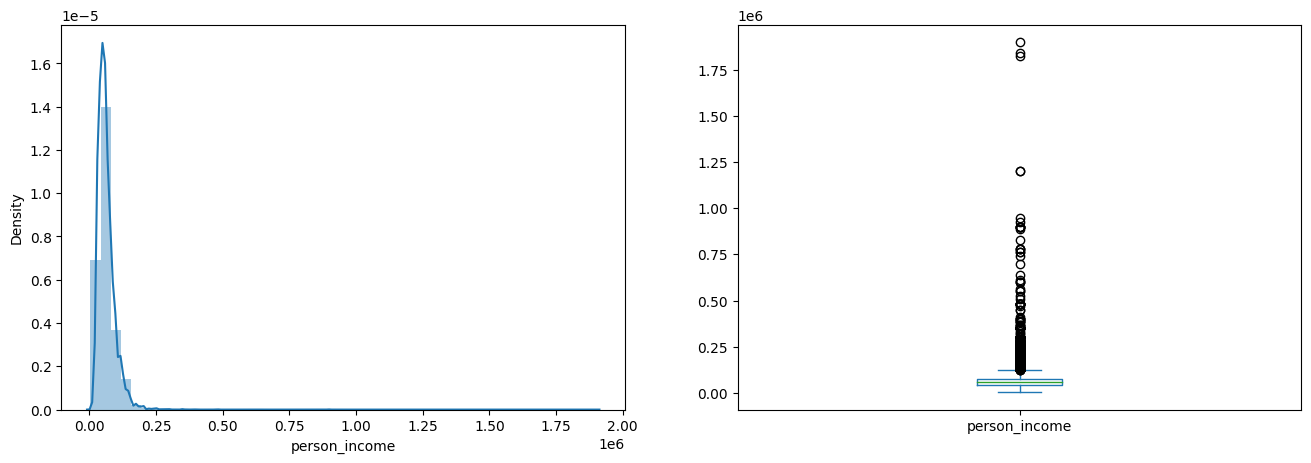

In [17]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['person_income']);

plt.subplot(122)
train['person_income'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

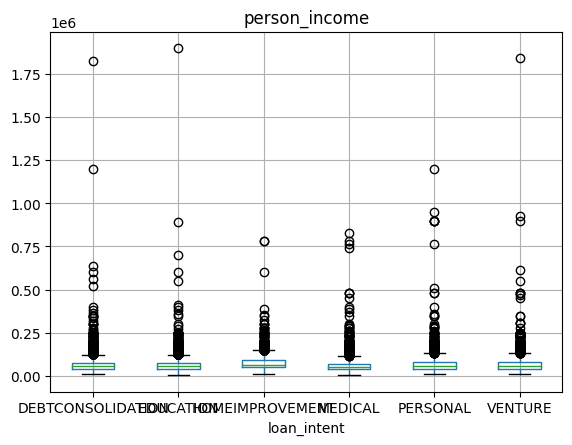

In [18]:
train.boxplot(column='person_income', by = 'loan_intent')
plt.suptitle("")

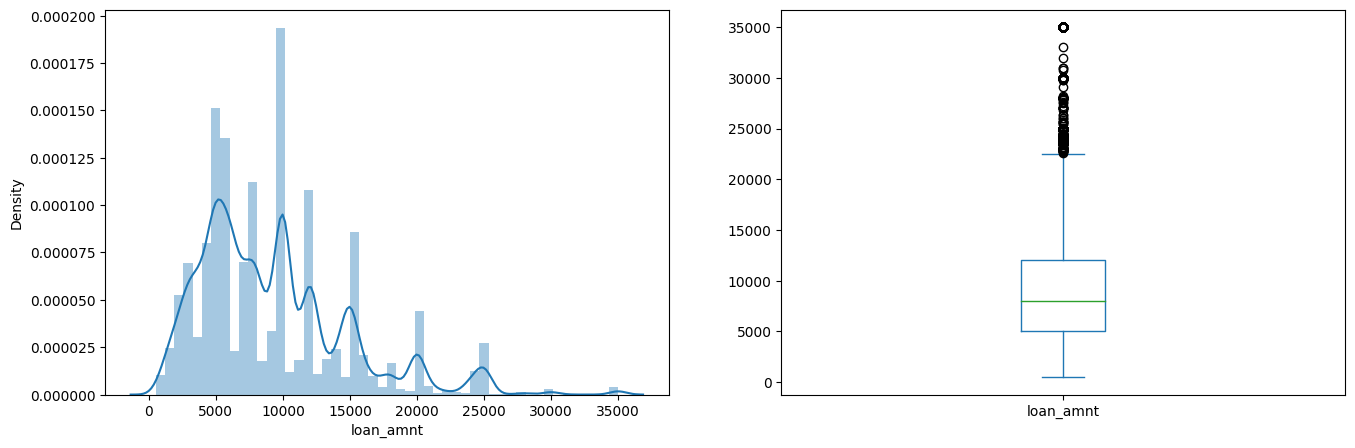

In [19]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['loan_amnt']);

plt.subplot(122)
train['loan_amnt'].plot.box(figsize=(16,5))

plt.show()

In [20]:
# frequency table of a variable will give us the count of each category in that variable
train['loan_amnt'].value_counts()

loan_amnt
10000    7128
5000     5176
6000     4676
12000    4311
15000    3348
         ... 
18150       1
21125       1
15025       1
21400       1
1150        1
Name: count, Length: 545, dtype: int64

<Axes: title={'center': 'loan_amnt'}, xlabel='loan_amnt'>

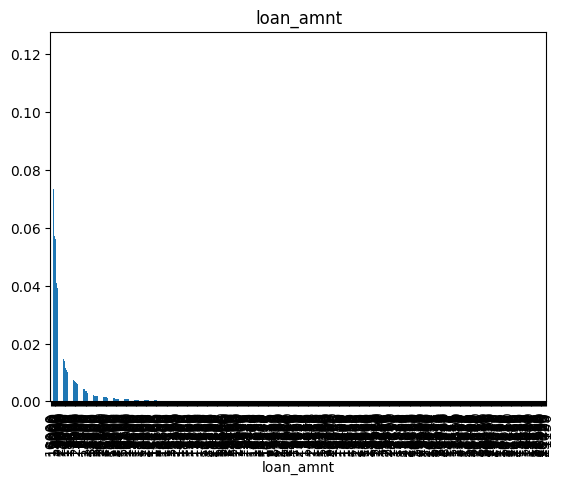

In [21]:
# plot bar chart
train['loan_amnt'].value_counts(normalize=True).plot.bar(title= 'loan_amnt')

### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

loan_status            0     1
loan_intent                   
DEBTCONSOLIDATION   7404  1729
EDUCATION          10949  1322
HOMEIMPROVEMENT     5189  1091
MEDICAL             8985  1949
PERSONAL            8686  1330
VENTURE             9082   929


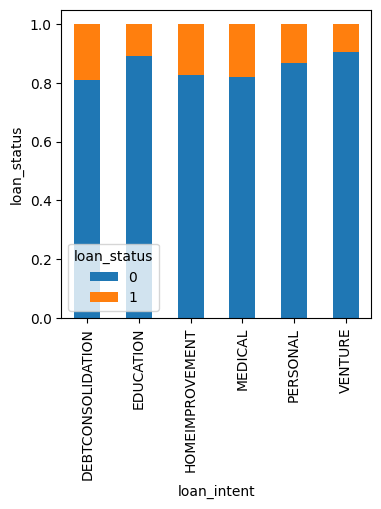

In [22]:
print(pd.crosstab(train['loan_intent'],train['loan_status']))

Gender = pd.crosstab(train['loan_intent'],train['loan_status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('loan_intent')
p = plt.ylabel('loan_status')

loan_status                0     1
person_home_ownership             
MORTGAGE               23341  1483
OTHER                     74    15
OWN                     3095    43
RENT                   23785  6809


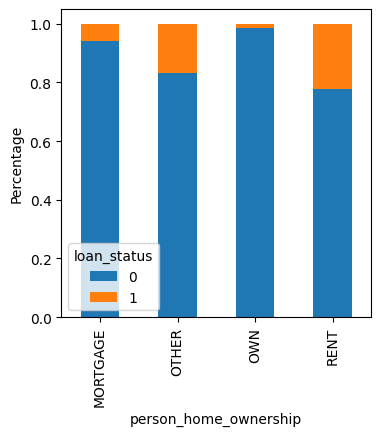

In [23]:
print(pd.crosstab(train['person_home_ownership'],train['loan_status']))

Married = pd.crosstab(train['person_home_ownership'],train['loan_status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('person_home_ownership')
p = plt.ylabel('Percentage')

loan_status            0     1
loan_intent                   
DEBTCONSOLIDATION   7404  1729
EDUCATION          10949  1322
HOMEIMPROVEMENT     5189  1091
MEDICAL             8985  1949
PERSONAL            8686  1330
VENTURE             9082   929


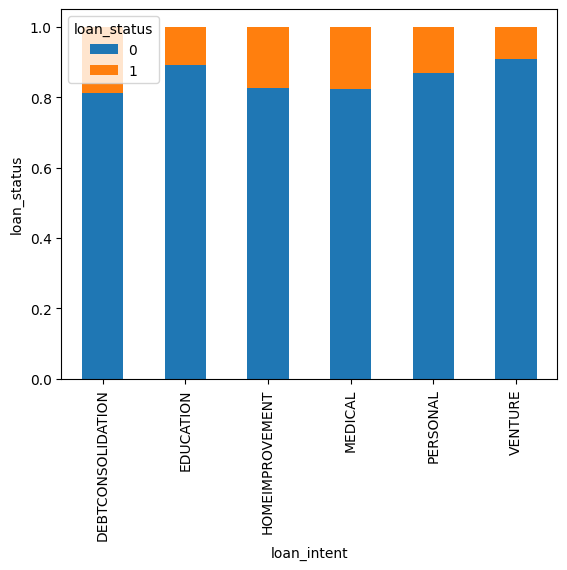

In [24]:
print(pd.crosstab(train['loan_intent'],train['loan_status']))

Dependents=pd.crosstab(train['loan_intent'],train['loan_status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('loan_intent')
p = plt.ylabel('loan_status')

loan_status      0     1
loan_grade              
A            19952  1032
B            18313  2087
C             9542  1494
D             2046  2988
E              378   631
F               58    91
G                6    27


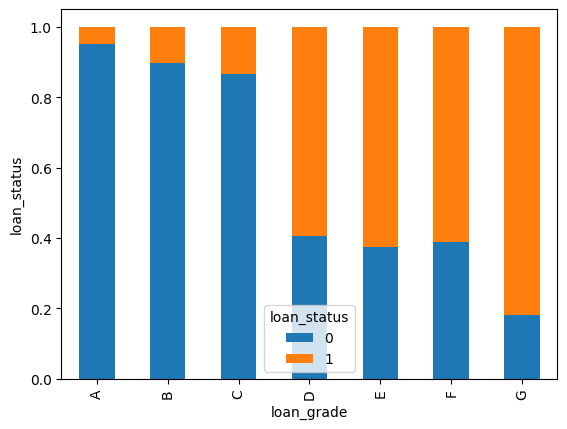

In [25]:
print(pd.crosstab(train['loan_grade'],train['loan_status']))

Dependents=pd.crosstab(train['loan_grade'],train['loan_status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('loan_grade')
p = plt.ylabel('loan_status')

loan_status                    0     1
cb_person_default_on_file             
N                          44194  5749
Y                           6101  2601


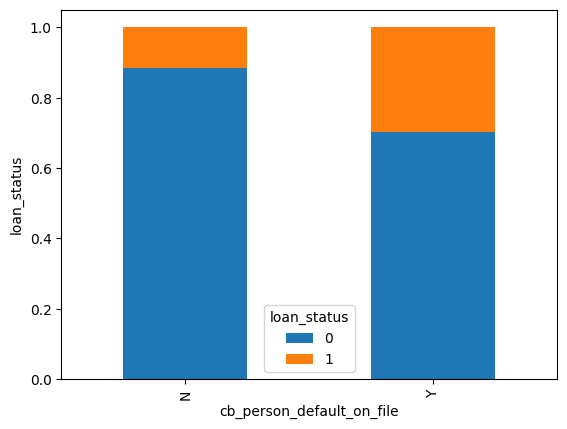

In [26]:
print(pd.crosstab(train['cb_person_default_on_file'],train['loan_status']))

Dependents=pd.crosstab(train['cb_person_default_on_file'],train['loan_status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('cb_person_default_on_file')
p = plt.ylabel('loan_status')

#### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

loan_status
0    66672.867720
1    48224.661796
Name: person_income, dtype: float64


<Axes: xlabel='loan_status'>

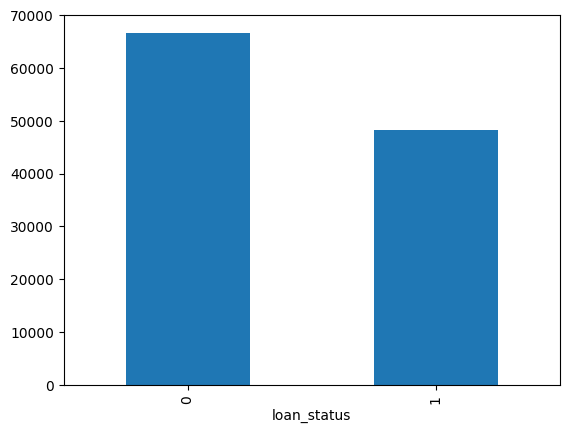

In [27]:
print(train.groupby('loan_status')['person_income'].mean())

train.groupby('loan_status')['person_income'].mean().plot.bar()

In [28]:
# making bins for applicant income variable
bins = [0,35000,45000,70000,110000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(train['person_income'],bins,labels=group)

In [29]:
# take a look at the train set
train.head(8)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,Income_bin
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0,Low
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0,High
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0,Low
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0,High
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0,High
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0,Average
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0,Average
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0,Low


loan_status      0     1
Income_bin              
Low           5833  2815
Average       7751  1737
High         19845  2687
Very high    12593   980


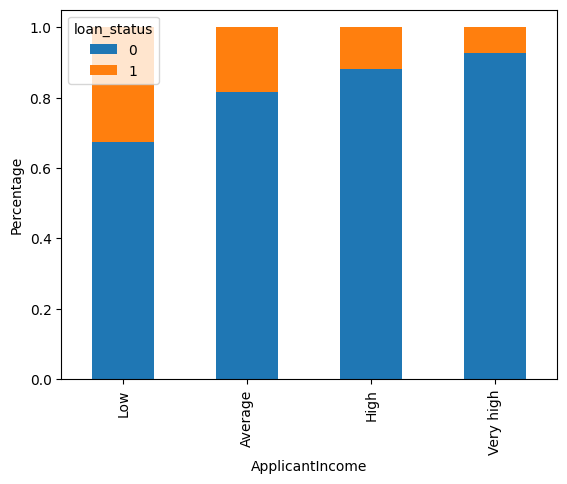

In [30]:
print(pd.crosstab(train['Income_bin'],train['loan_status']))

Income_bin = pd.crosstab(train['Income_bin'],train['loan_status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [31]:
# making bins for applicant income variable
bins = [0,25000,40000,60000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['person_income'],bins,labels=group)

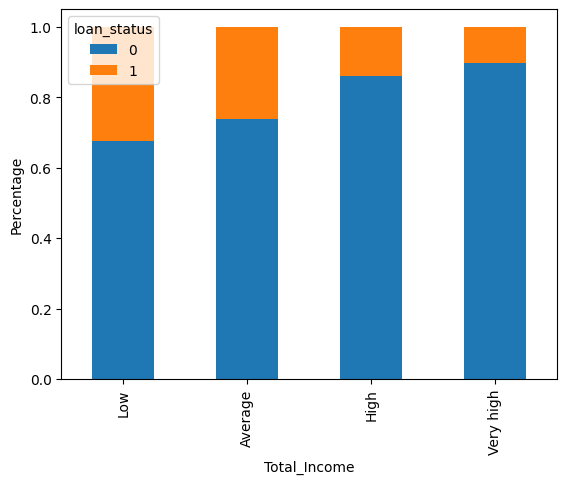

In [32]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['loan_status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [33]:
# making bins for Coapplicant income variable
bins = [0,7000,9000,12000]
group = ['Low','Average','High']
train['cb_person_cred_hist_length'] = pd.cut(train['loan_percent_income'],bins,labels=group)

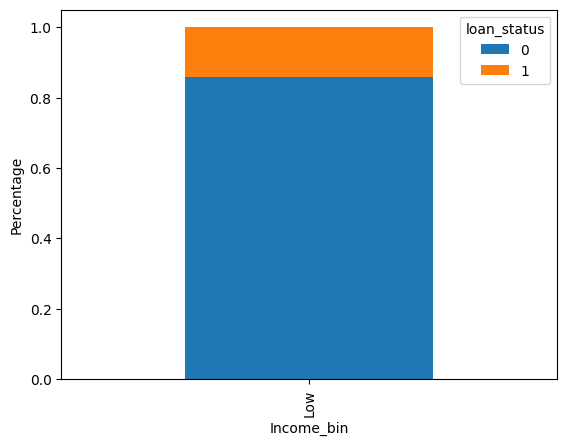

In [34]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['cb_person_cred_hist_length'],train['loan_status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Income_bin')
P = plt.ylabel('Percentage')

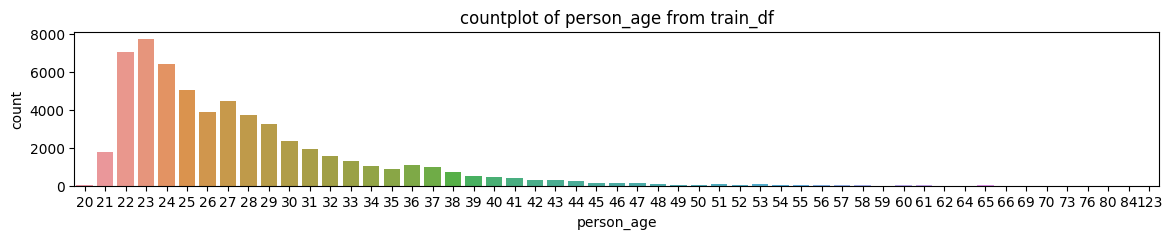

In [35]:
# person_age from train_df
plt.figure(figsize=(14, 2))
sns.countplot(x="person_age", data=train)
plt.title("countplot of person_age from train_df")
plt.show()
# age_123 is an out-lier?

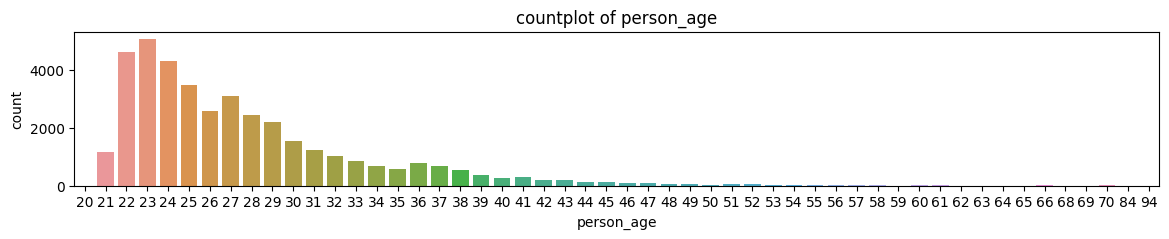

In [36]:
# person_age from test_df
plt.figure(figsize=(14, 2))
sns.countplot(x="person_age", data=test)
plt.title("countplot of person_age")
plt.show()

In [37]:
# Kolmogorov-Smirnov test
import scipy.stats as stats
ks_statistic, p_value = stats.ks_2samp(train.person_age, test.person_age)
print("KS statistic:", ks_statistic)
print("p-value:", p_value)
# no difference in two dist.

KS statistic: 0.005099418086391028
p-value: 0.5735005227761814


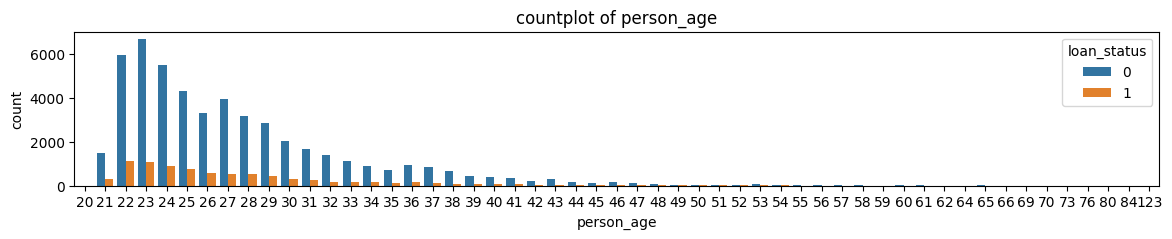

In [38]:
# person_age with loan_status
plt.figure(figsize=(14, 2))
sns.countplot(x="person_age", hue='loan_status', data=train)
plt.title("countplot of person_age")
plt.show()

In [39]:
# categorical_sum
def categorical_sum(df, categorical_column): 
    categorical_sum = df.groupby([categorical_column]).size().reset_index(name='sum')
    return categorical_sum

# categorical_count_by_categorical_status
def count_by_status(df, categorical_column, categorical_status): 
    count_by_status = df.groupby(
        [categorical_column, categorical_status]).size().reset_index(name='count')
    return count_by_status

In [40]:
# age_sum
age_sum = categorical_sum(train, 'person_age')
print(age_sum.shape)
age_sum.head()

(53, 2)


,person_age,sum
0,20,12
1,21,1795
2,22,7051
3,23,7726
4,24,6395


In [41]:
# age_by_loan
age_by_loan = count_by_status(train, 'person_age', 'loan_status')
print(age_by_loan.shape)
age_by_loan.head()

(100, 3)


,person_age,loan_status,count
0,20,0,9
1,20,1,3
2,21,0,1488
3,21,1,307
4,22,0,5921


In [42]:
age_loan_1 = age_by_loan[age_by_loan['loan_status'] == 1].reset_index(drop=True)
age_loan_1['loan_1_ratio'] = age_loan_1['count'] / age_sum['sum']
print(age_loan_1.shape)
age_loan_1.head()

(49, 4)


,person_age,loan_status,count,loan_1_ratio
0,20,1,3,0.250000
1,21,1,307,0.171031
2,22,1,1130,0.160261
3,23,1,1067,0.138105
4,24,1,898,0.140422


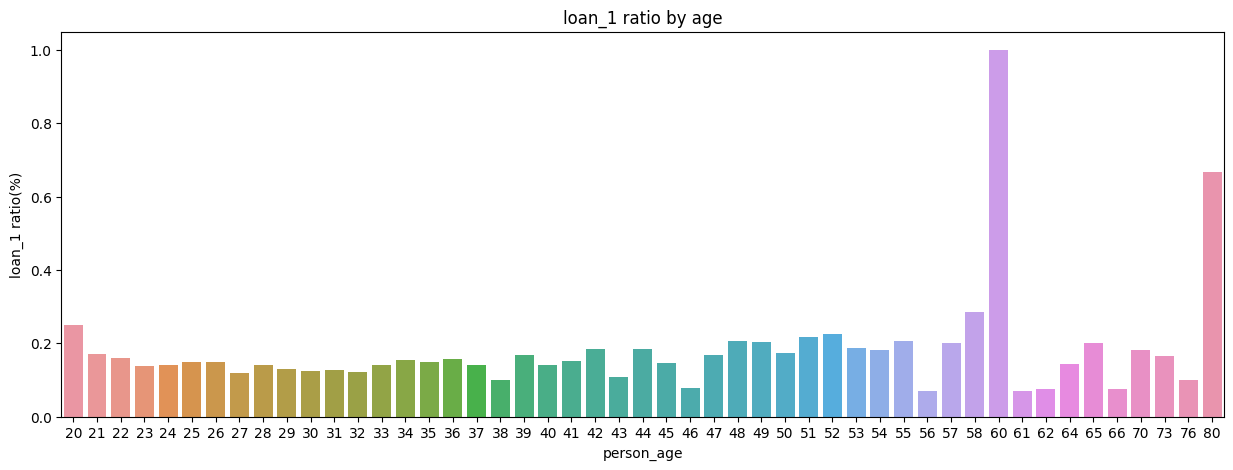

In [43]:
# loan ratio by age
plt.figure(figsize=(15, 5))
sns.barplot(x='person_age', y='loan_1_ratio', data=age_loan_1)
plt.title('loan_1 ratio by age')
plt.ylabel('loan_1 ratio(%)')
plt.show()

### 2. loan_status by income

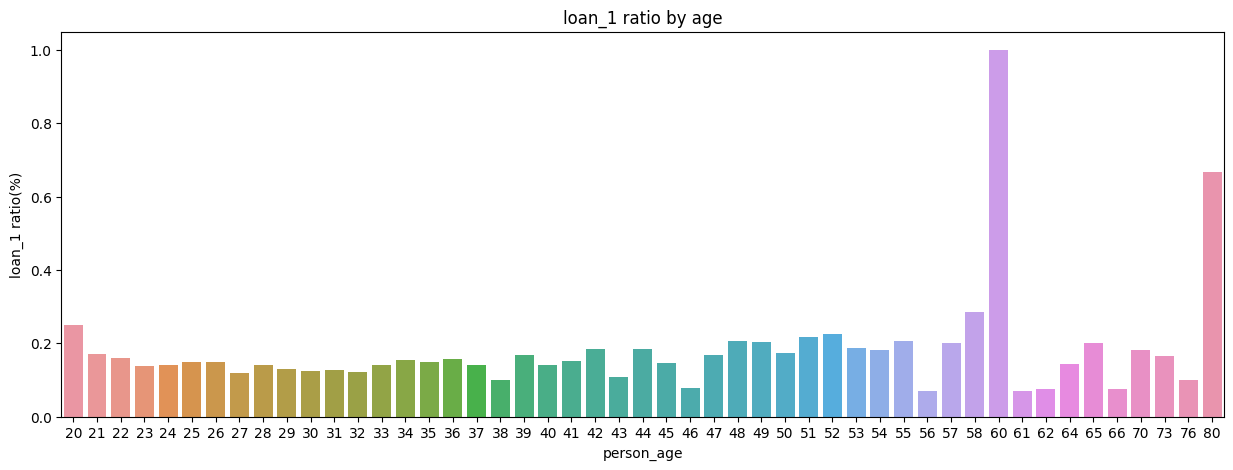

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x='person_age', y='loan_1_ratio', data=age_loan_1)
plt.title('loan_1 ratio by age')
plt.ylabel('loan_1 ratio(%)')
plt.show()

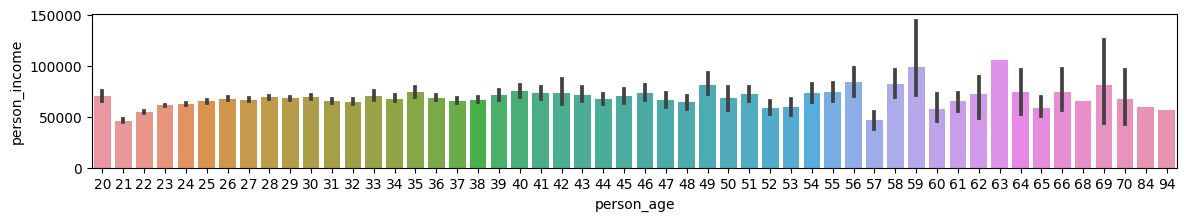

In [45]:
# person_income by age
plt.figure(figsize=(14, 2))
sns.barplot(x='person_age', y='person_income', data=test)
plt.show()

In [46]:
# income range
train.person_income.describe()

count    5.864500e+04
mean     6.404617e+04
std      3.793111e+04
min      4.200000e+03
25%      4.200000e+04
50%      5.800000e+04
75%      7.560000e+04
max      1.900000e+06
Name: person_income, dtype: float64

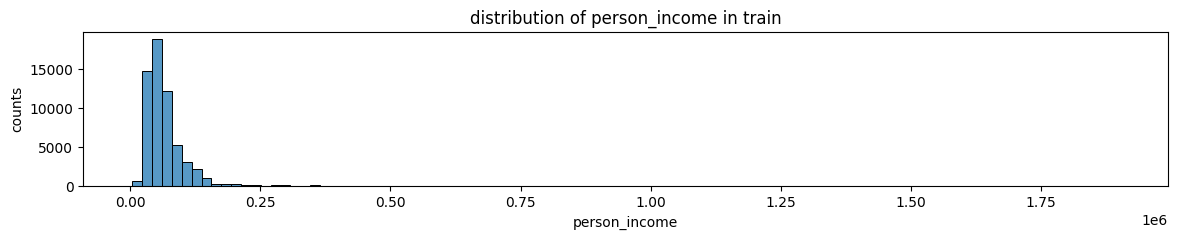

In [47]:
plt.figure(figsize=(14, 2))
sns.histplot(data=train, x='person_income', bins=100)
plt.title('distribution of person_income in train')
plt.xlabel('person_income')
plt.ylabel('counts')
plt.show()

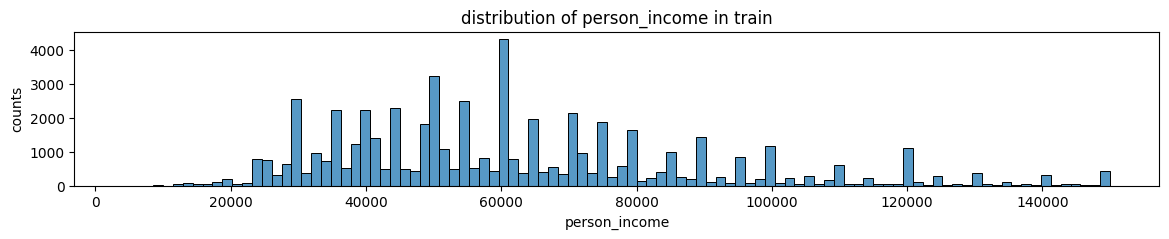

(57765, 15)

In [48]:
# filtered income range
plt.figure(figsize=(14, 2))
filtered_df = train[(train['person_income'] >= 0) & (train['person_income'] <= 150000)]
sns.histplot(data=filtered_df, x='person_income', bins=100)
plt.title('distribution of person_income in train')
plt.xlabel('person_income')
plt.ylabel('counts')
plt.show()
filtered_df.shape

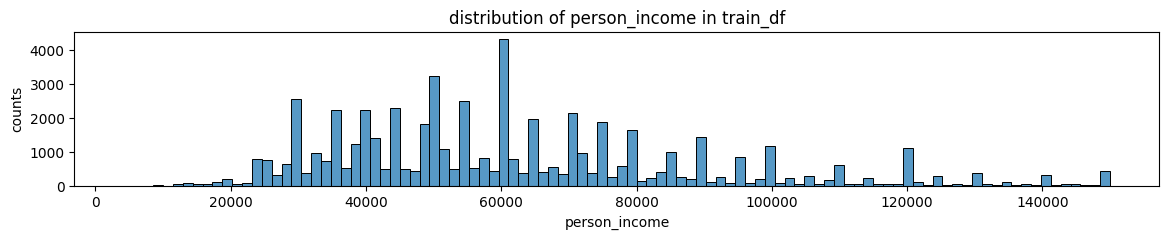

(57765, 15)

In [49]:
# filtered income range
plt.figure(figsize=(14, 2))
filtered_df = train[(train['person_income'] >= 0) & (train['person_income'] <= 150000)]
sns.histplot(data=filtered_df, x='person_income', bins=100)
plt.title('distribution of person_income in train_df')
plt.xlabel('person_income')
plt.ylabel('counts')
plt.show()
filtered_df.shape

In [50]:
print(filtered_df.shape)
filtered_df.head(2)

(57765, 15)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,Income_bin,Total_Income_bin
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,Low,0,Low,Average
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,Low,0,High,High


In [51]:
# ratio of filtered_df
filtered_df.shape[0]/train.shape[0]

0.9849944581805781

In [52]:
# income range grouping 
loan_income_df = pd.DataFrame()
loan_income_df['income_group'] = pd.qcut(filtered_df['person_income'], q=10, 
                                      labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])
loan_income_df['person_income'] = filtered_df.person_income
loan_income_df['loan_status'] = filtered_df.loan_status
print(loan_income_df.shape)
loan_income_df.head(2)

(57765, 3)


,income_group,person_income,loan_status
0,Q2,35000,0
1,Q5,56000,0


In [53]:
# income_group_sum
income_group_sum = categorical_sum(loan_income_df, 'income_group')
print(income_group_sum.shape)
income_group_sum.head()

(10, 2)


,income_group,sum
0,Q1,5814
1,Q2,5883
2,Q3,6439
3,Q4,5794
4,Q5,5005


In [54]:
# income_loan
income_loan = count_by_status(loan_income_df, 'income_group', 'loan_status')
print(income_loan.shape)
income_loan.head()

(20, 3)


,income_group,loan_status,count
0,Q1,0,3832
1,Q1,1,1982
2,Q2,0,4314
3,Q2,1,1569
4,Q3,0,5438


In [55]:
# loan_1 ratio by income
loan_1_income_group = income_loan[income_loan['loan_status'] == 1].reset_index(drop=True)
loan_1_income_group['loan_1_ratio'] = loan_1_income_group['count'] / income_group_sum['sum']
print(loan_1_income_group.shape)
loan_1_income_group.head()

(10, 4)


,income_group,loan_status,count,loan_1_ratio
0,Q1,1,1982,0.340901
1,Q2,1,1569,0.266701
2,Q3,1,1001,0.155459
3,Q4,1,663,0.114429
4,Q5,1,865,0.172827


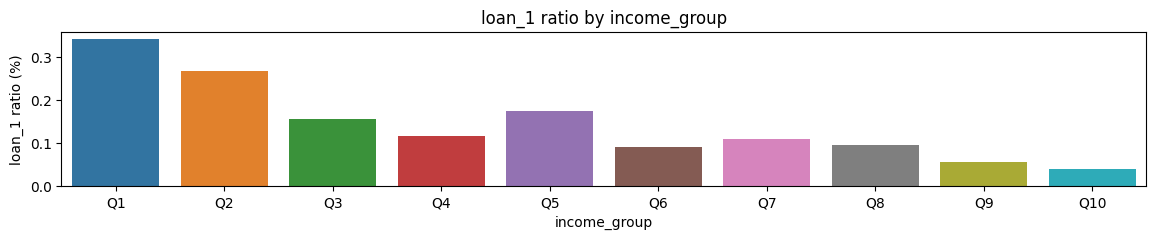

In [56]:
# loan_1 ratio by income_group 
plt.figure(figsize=(14, 2))
sns.barplot(x='income_group', y='loan_1_ratio', data=loan_1_income_group)
plt.title('loan_1 ratio by income_group')
plt.ylabel('loan_1 ratio (%)')
plt.show()
# The lower income group, the more likely to take out a loan

### 3. loan_status by person_home_ownership

In [57]:
# home_ownership_sum
home_ownership_sum = categorical_sum(train, 'person_home_ownership')
print(home_ownership_sum.shape)
home_ownership_sum.head()

(4, 2)


,person_home_ownership,sum
0,MORTGAGE,24824
1,OTHER,89
2,OWN,3138
3,RENT,30594


In [58]:
# home_ownership_loan
home_ownership_loan = count_by_status(train, 'person_home_ownership', 'loan_status')
print(home_ownership_loan.shape)
home_ownership_loan.head()

(8, 3)


,person_home_ownership,loan_status,count
0,MORTGAGE,0,23341
1,MORTGAGE,1,1483
2,OTHER,0,74
3,OTHER,1,15
4,OWN,0,3095


In [59]:
loan_1_home_ownership = home_ownership_loan[home_ownership_loan['loan_status'] == 1].reset_index(drop=True)
loan_1_home_ownership['loan_1_ratio'] = loan_1_home_ownership['count'] / home_ownership_sum['sum']
print(loan_1_home_ownership.shape)
loan_1_home_ownership.head()

(4, 4)


,person_home_ownership,loan_status,count,loan_1_ratio
0,MORTGAGE,1,1483,0.059741
1,OTHER,1,15,0.168539
2,OWN,1,43,0.013703
3,RENT,1,6809,0.222560


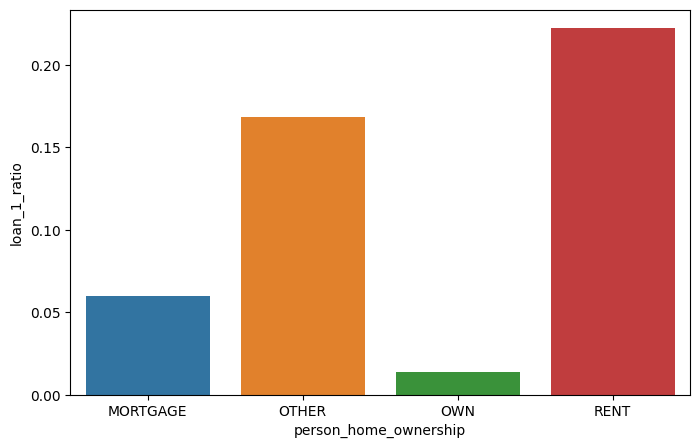

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(x='person_home_ownership', y='loan_1_ratio', data=loan_1_home_ownership)
plt.show()

### 4. person_emp_length

In [61]:
train.person_emp_length.describe()

count    58645.000000
mean         4.701015
std          3.959784
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [62]:
test.person_emp_length.describe()

count    39098.000000
mean         4.687068
std          3.868395
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         42.000000
Name: person_emp_length, dtype: float64

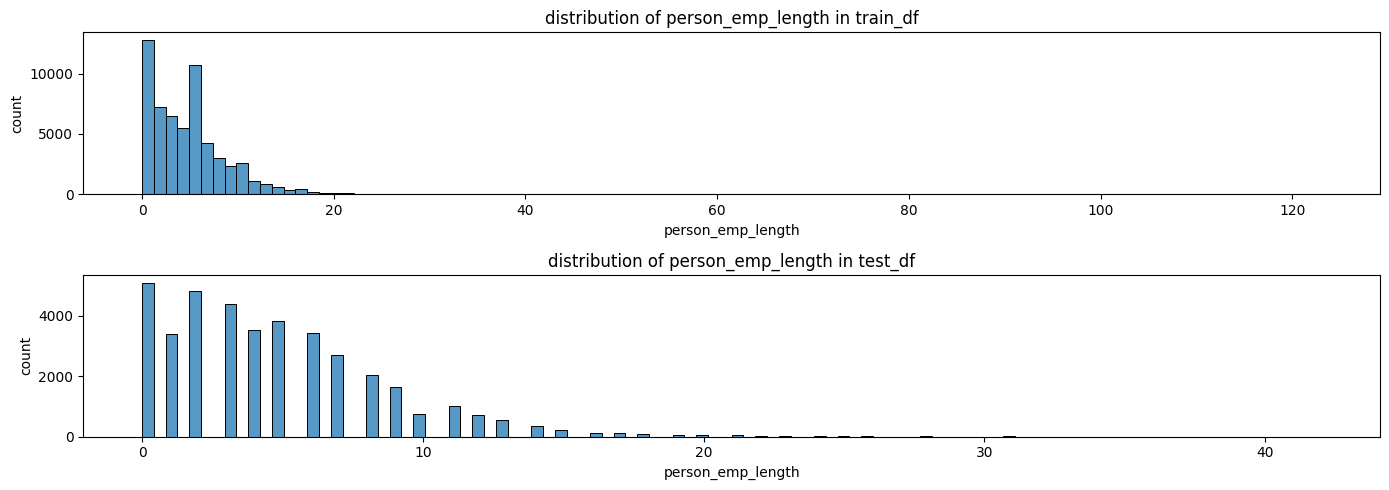

In [63]:
# person_emp_length histplot
plt.figure(figsize=(14, 5))  
plt.subplot(2, 1, 1) 
sns.histplot(data=train, x='person_emp_length', bins=100)
plt.title('distribution of person_emp_length in train_df')
plt.xlabel('person_emp_length')
plt.ylabel('count')

plt.subplot(2, 1, 2)  
sns.histplot(data=test, x='person_emp_length', bins=100)
plt.title('distribution of person_emp_length in test_df')
plt.xlabel('person_emp_length')
plt.ylabel('count')

plt.tight_layout() 
plt.show()

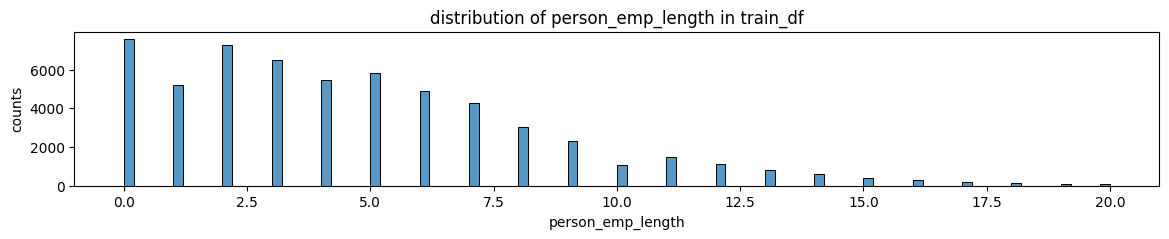

(58476, 15)

In [64]:
# filtered person_emp_length range
plt.figure(figsize=(14, 2))
filtered_df = train[(train['person_emp_length'] >= 0) & (train['person_emp_length'] <= 20)]
sns.histplot(data=filtered_df, x='person_emp_length', bins=100)
plt.title('distribution of person_emp_length in train_df')
plt.xlabel('person_emp_length')
plt.ylabel('counts')
plt.show()
filtered_df.shape

In [65]:
train.person_emp_length.value_counts()

person_emp_length
0.0      7586
2.0      7270
3.0      6475
5.0      5839
4.0      5461
1.0      5203
6.0      4902
7.0      4275
8.0      3015
9.0      2290
11.0     1491
12.0     1105
10.0     1072
13.0      797
14.0      590
15.0      367
16.0      280
17.0      168
18.0      153
21.0       78
19.0       72
20.0       65
22.0       20
24.0       14
23.0       12
26.0       11
25.0        8
27.0        7
31.0        5
28.0        4
30.0        2
123.0       2
41.0        2
29.0        2
35.0        1
39.0        1
Name: count, dtype: int64

In [66]:
# ratio of filtered_df
filtered_df.shape[0]/train.shape[0]

0.9971182539005883

In [67]:
# emp_length range grouping 
bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 9.5, 20.5]
labels = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']

loan_emp_length = pd.DataFrame()
loan_emp_length['emp_length_group'] = pd.cut(filtered_df['person_emp_length'], bins=bins, labels=labels)

loan_emp_length['person_emp_length'] = filtered_df.person_emp_length
loan_emp_length['loan_status'] = filtered_df.loan_status

loan_emp_length = loan_emp_length.reset_index(drop=True)
print(loan_emp_length.shape)
loan_emp_length.head()

(58476, 3)


,emp_length_group,person_emp_length,loan_status
0,Q1,0.0,0
1,Q7,6.0,0
2,Q9,8.0,0
3,Q10,14.0,0
4,Q3,2.0,0


In [68]:
# emp_length_sum
emp_length_group_sum = categorical_sum(loan_emp_length, 'emp_length_group')
print(emp_length_group_sum.shape)
emp_length_group_sum.head()

(10, 2)


,emp_length_group,sum
0,Q1,7586
1,Q2,5203
2,Q3,7270
3,Q4,6475
4,Q5,5461


In [69]:
# emp_length_loan
emp_length_loan = count_by_status(loan_emp_length, 'emp_length_group', 'loan_status')
print(emp_length_loan.shape)
emp_length_loan.head()

(20, 3)


,emp_length_group,loan_status,count
0,Q1,0,6070
1,Q1,1,1516
2,Q2,0,4089
3,Q2,1,1114
4,Q3,0,5885


In [70]:
# loan_1 ratio by emp_length
loan_1_emp_length_group = emp_length_loan[emp_length_loan['loan_status'] == 1].reset_index(drop=True)
loan_1_emp_length_group['loan_1_ratio'] = loan_1_emp_length_group['count'] / emp_length_group_sum['sum']
print(loan_1_emp_length_group.shape)
loan_1_emp_length_group.head()

(10, 4)


,emp_length_group,loan_status,count,loan_1_ratio
0,Q1,1,1516,0.199842
1,Q2,1,1114,0.214107
2,Q3,1,1385,0.190509
3,Q4,1,870,0.134363
4,Q5,1,728,0.133309


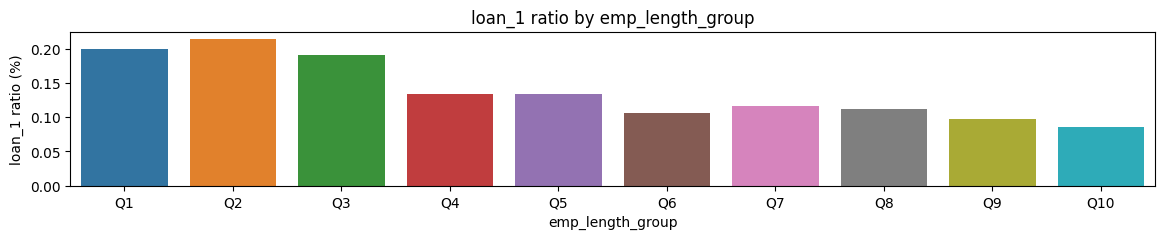

In [71]:
# loan_1 ratio by emp_length_group 
plt.figure(figsize=(14, 2))
sns.barplot(x='emp_length_group', y='loan_1_ratio', data=loan_1_emp_length_group)
plt.title('loan_1 ratio by emp_length_group')
plt.ylabel('loan_1 ratio (%)')
plt.show()
# Employee are more likely to get a loan early in their career.

#### 5. loan_intent

In [72]:
train.loan_intent.value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [73]:
intent_by_age = count_by_status(train, 'loan_intent', 'person_age')
print(intent_by_age.shape)
intent_by_age

(266, 3)


,loan_intent,person_age,count
0,DEBTCONSOLIDATION,20,2
1,DEBTCONSOLIDATION,21,266
2,DEBTCONSOLIDATION,22,1122
3,DEBTCONSOLIDATION,23,1108
4,DEBTCONSOLIDATION,24,1021
...,...,...,...
261,VENTURE,56,1
262,VENTURE,57,4
263,VENTURE,58,6
264,VENTURE,60,4


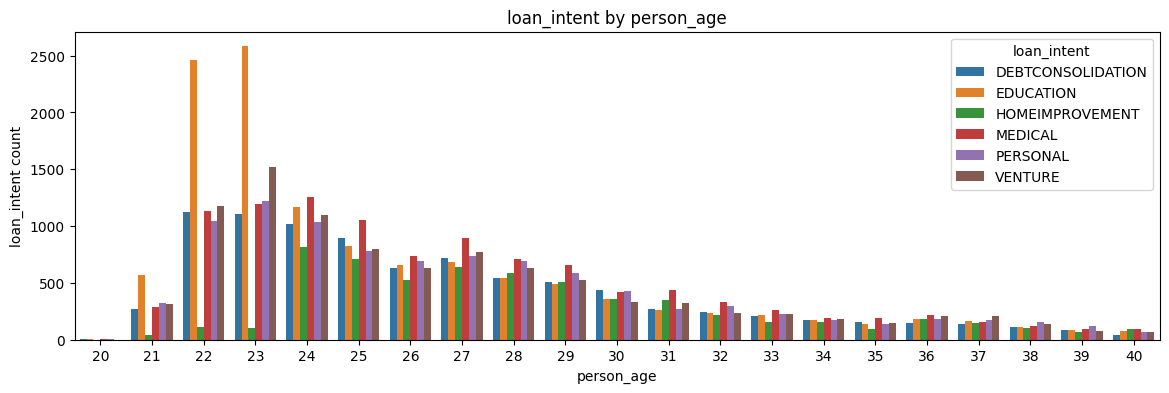

In [74]:
plt.figure(figsize=(14, 4))
filtered_df = intent_by_age[(intent_by_age['person_age'] >= 0) & (intent_by_age['person_age'] <= 40)]
sns.barplot(x='person_age', y='count', hue='loan_intent', data=filtered_df)
plt.title('loan_intent by person_age')
plt.ylabel('loan_intent count')
plt.show()

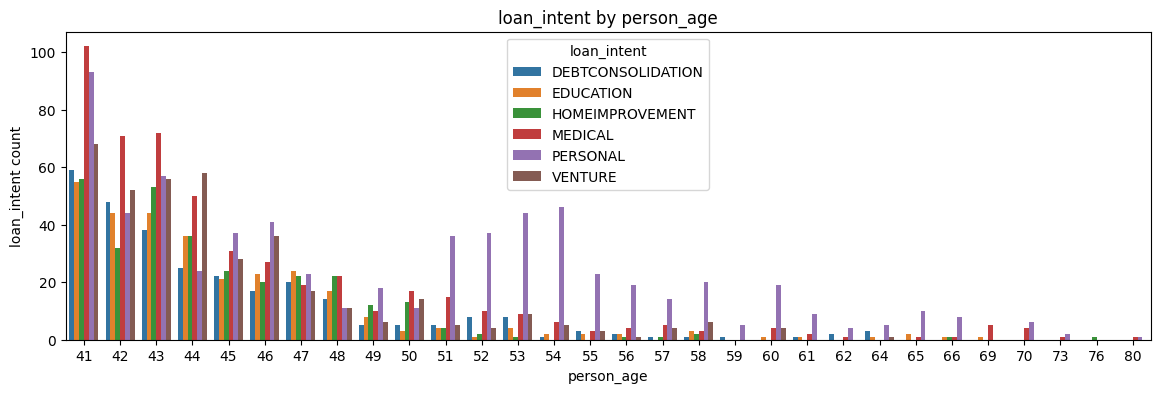

In [75]:
# loan_intent by age 41~80
plt.figure(figsize=(14, 4))
filtered_df = intent_by_age[(intent_by_age['person_age'] >= 41) & (intent_by_age['person_age'] <= 80)]
sns.barplot(x='person_age', y='count', hue='loan_intent', data=filtered_df)
plt.title('loan_intent by person_age')
plt.ylabel('loan_intent count')
plt.show()

### 6. loan_grade

In [76]:
# loan_grade_sum
loan_grade_sum = categorical_sum(train, 'loan_grade')
print(loan_grade_sum.shape)
loan_grade_sum

(7, 2)


,loan_grade,sum
0,A,20984
1,B,20400
2,C,11036
3,D,5034
4,E,1009
5,F,149
6,G,33


In [77]:
# loan_grade_loan
loan_grade_loan = count_by_status(train, 'loan_grade', 'loan_status')
print(loan_grade_loan.shape)
loan_grade_loan

(14, 3)


,loan_grade,loan_status,count
0,A,0,19952
1,A,1,1032
2,B,0,18313
3,B,1,2087
4,C,0,9542
5,C,1,1494
6,D,0,2046
7,D,1,2988
8,E,0,378
9,E,1,631


In [78]:
# loan_1 ratio by loan_grade
loan_1_loan_grade = loan_grade_loan[loan_grade_loan['loan_status'] == 1].reset_index(drop=True)
loan_1_loan_grade['loan_1_ratio'] = loan_1_loan_grade['count'] / loan_grade_sum['sum']
print(loan_1_loan_grade.shape)
loan_1_loan_grade

(7, 4)


,loan_grade,loan_status,count,loan_1_ratio
0,A,1,1032,0.049180
1,B,1,2087,0.102304
2,C,1,1494,0.135375
3,D,1,2988,0.593564
4,E,1,631,0.625372
5,F,1,91,0.610738
6,G,1,27,0.818182


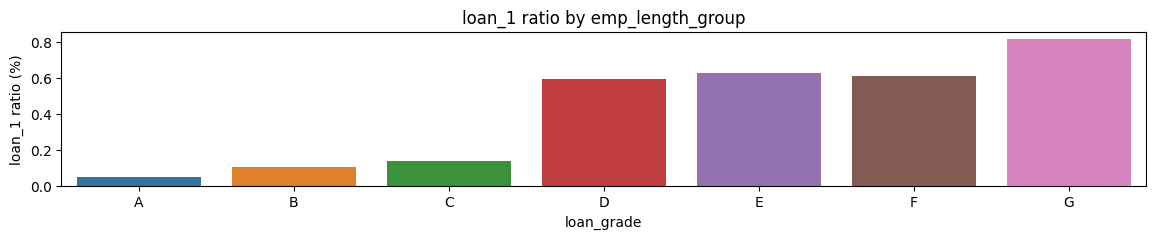

In [79]:
# loan_1 ratio by loan_grade 
plt.figure(figsize=(14, 2))
sns.barplot(x='loan_grade', y='loan_1_ratio', data=loan_1_loan_grade)
plt.title('loan_1 ratio by emp_length_group')
plt.ylabel('loan_1 ratio (%)')
plt.show()

#### 7. loan_int_rate

In [80]:
train.loan_int_rate.describe()

count    58645.000000
mean        10.677874
std          3.034697
min          5.420000
25%          7.880000
50%         10.750000
75%         12.990000
max         23.220000
Name: loan_int_rate, dtype: float64

In [81]:
def plot_regressions(data, features, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    
    for i, feature in enumerate(features, start=1): 
        plt.subplot(len(features), 1, i)
        
        try:
            # Plot regression
            sns.regplot(data=data, x=feature, y='loan_int_rate', line_kws={'color':'gray'}) 
            
            # Fit linear regression model
            model = LinearRegression()
            model.fit(data[[feature]], data['loan_int_rate'])
            # Optionally print model coefficients (if needed)
            # print(f'{feature} model coefficient: {model.coef_}')
            
        except Exception as e:
            print(f"Error encountered with feature {feature}: {e}")
        
        plt.tight_layout()
    
    plt.show()

### 8. loan_percent_income

In [82]:
train.loan_percent_income.describe()

count    58645.000000
mean         0.159238
std          0.091692
min          0.000000
25%          0.090000
50%          0.140000
75%          0.210000
max          0.830000
Name: loan_percent_income, dtype: float64

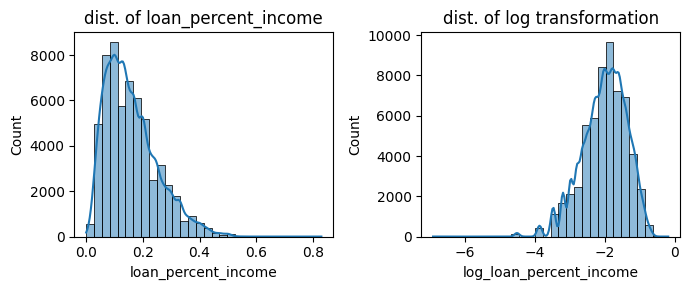

In [83]:
# distribution
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)  
sns.histplot(data=train, x="loan_percent_income", bins=30, kde=True)
plt.title("dist. of loan_percent_income")

plt.subplot(1, 2, 2) 
train['log_loan_percent_income'] = np.log(train['loan_percent_income']+0.001)
sns.histplot(data=train, x="log_loan_percent_income", bins=30, kde=True)
plt.title("dist. of log transformation")

plt.tight_layout()  
plt.show()

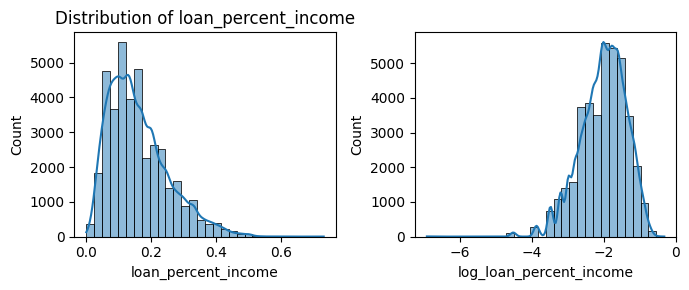

In [84]:
# Convert the relevant column to float32 or float64
test['loan_percent_income'] = test['loan_percent_income'].astype('float32')

# Now create the plot
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sns.histplot(data=test, x="loan_percent_income", bins=30, kde=True)
plt.title("Distribution of loan_percent_income")

plt.subplot(1, 2, 2) 
test['log_loan_percent_income'] = np.log(test['loan_percent_income']+0.001)
sns.histplot(data=test, x="log_loan_percent_income", bins=30, kde=True)
plt.subplot(1, 2, 2)
# Add your second plot here if needed

plt.tight_layout()
plt.show()


#### 9. cb_person_default_on_file

In [85]:
train.cb_person_default_on_file.value_counts()

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [86]:
default_sum = categorical_sum(train, 'cb_person_default_on_file')
print(default_sum.shape)
default_sum.head()

(2, 2)


,cb_person_default_on_file,sum
0,N,49943
1,Y,8702


In [87]:
# default_by_loan
default_by_loan = count_by_status(train, 'cb_person_default_on_file', 'loan_status')
print(default_by_loan.shape)
default_by_loan.head()

(4, 3)


,cb_person_default_on_file,loan_status,count
0,N,0,44194
1,N,1,5749
2,Y,0,6101
3,Y,1,2601


In [88]:
# loan_1 ratio by default
default_loan_1 = default_by_loan[default_by_loan['loan_status'] == 1].reset_index(drop=True)
default_loan_1['loan_1_ratio'] = default_loan_1['count'] / default_sum['sum']
print(default_loan_1.shape)
default_loan_1.head()

(2, 4)


,cb_person_default_on_file,loan_status,count,loan_1_ratio
0,N,1,5749,0.115111
1,Y,1,2601,0.298897


#### 10. cb_person_cred_hist_length

In [89]:
train.cb_person_cred_hist_length.describe()

count     58643
unique        1
top         Low
freq      58643
Name: cb_person_cred_hist_length, dtype: object

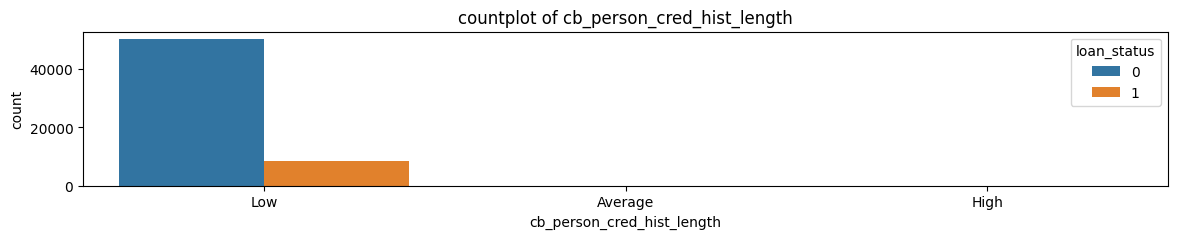

In [90]:
# cred_hist_length with loan_status
plt.figure(figsize=(14, 2))
sns.countplot(x="cb_person_cred_hist_length", hue='loan_status', data=train)
plt.title("countplot of cb_person_cred_hist_length")
plt.show()

In [91]:
# cb_person_cred_hist_length_sum
cred_hist_length_sum = categorical_sum(train, 'cb_person_cred_hist_length')
print(cred_hist_length_sum.shape)
cred_hist_length_sum.head()

(3, 2)


,cb_person_cred_hist_length,sum
0,Low,58643
1,Average,0
2,High,0


In [92]:
# cred_hist_length_by_loan
cred_hist_length_by_loan = count_by_status(train, 'cb_person_cred_hist_length', 'loan_status')
print(cred_hist_length_by_loan.shape)
cred_hist_length_by_loan.head()

(6, 3)


,cb_person_cred_hist_length,loan_status,count
0,Low,0,50293
1,Low,1,8350
2,Average,0,0
3,Average,1,0
4,High,0,0


In [93]:
# loan_1 ratio by cred_hist_length
cred_hist_length_loan_1 = cred_hist_length_by_loan[cred_hist_length_by_loan['loan_status'] == 1].reset_index(drop=True)
cred_hist_length_loan_1['loan_1_ratio'] = cred_hist_length_loan_1['count'] / cred_hist_length_sum['sum']
print(cred_hist_length_loan_1.shape)
cred_hist_length_loan_1.head()

(3, 4)


,cb_person_cred_hist_length,loan_status,count,loan_1_ratio
0,Low,1,8350,0.142387
1,Average,1,0,NaN
2,High,1,0,NaN


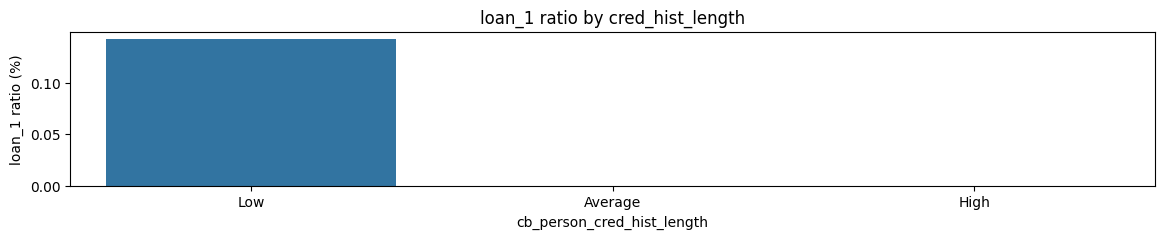

In [94]:
# loan_1 ratio by cred_hist_length 
plt.figure(figsize=(14, 2))
sns.barplot(x='cb_person_cred_hist_length', y='loan_1_ratio', data=cred_hist_length_loan_1)
plt.title('loan_1 ratio by cred_hist_length')
plt.ylabel('loan_1 ratio (%)')
plt.show()
# The longer cred_hist_length, the more likely to take out a loan.

In [95]:
# First, calculate the total sum if it hasn't been done already
cred_hist_length_sum = cred_hist_length_by_loan['count'].sum()

# Now filter the DataFrame for loan_status == 1 and calculate loan_1_ratio
cred_hist_length_loan_1 = cred_hist_length_by_loan[cred_hist_length_by_loan['loan_status'] == 1].reset_index(drop=True)
cred_hist_length_loan_1['loan_1_ratio'] = cred_hist_length_loan_1['count'] / cred_hist_length_sum

print(cred_hist_length_loan_1.shape)
cred_hist_length_loan_1.head()


(3, 4)


,cb_person_cred_hist_length,loan_status,count,loan_1_ratio
0,Low,1,8350,0.142387
1,Average,1,0,0.000000
2,High,1,0,0.000000


## 4. feature engineering

In [96]:
train.shape

(58645, 16)

In [97]:
# filtered income range
filtered_train = train[(train['person_income'] >= 0) & 
                          (train['person_income'] <= 150000)] # 150K
print(filtered_train.shape)
print(filtered_train.shape[0]/train.shape[0])

filtered_train = filtered_train[(filtered_train['person_age'] >= 20) & 
                                (filtered_train['person_age'] <= 70)] #60
print(filtered_train.shape)
print(filtered_train.shape[0]/train.shape[0])

filtered_train = filtered_train[(filtered_train['person_emp_length'] >= -0.5) & 
                                (filtered_train['person_emp_length'] <= 20.5)] 
print(filtered_train.shape)
print(filtered_train.shape[0]/train.shape[0])

(57765, 16)
0.9849944581805781
(57756, 16)
0.9848409924119703
(57596, 16)
0.9821127120811664


In [98]:
filtered_train.reset_index(drop=True, inplace=True)
print(filtered_train.shape)
filtered_train.tail()

(57596, 16)


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,Income_bin,Total_Income_bin,log_loan_percent_income
57591,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,Low,0,NaN,NaN,-1.555897
57592,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,Low,1,Low,Average,-1.046969
57593,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,Low,1,Average,High,-1.890475
57594,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,Low,0,Low,Average,-1.766092
57595,58644,31,75000,MORTGAGE,2.0,VENTURE,B,15000,11.11,0.20,N,Low,0,Very high,Very high,-1.604450


In [99]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57596 entries, 0 to 57595
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          57596 non-null  int64   
 1   person_age                  57596 non-null  int64   
 2   person_income               57596 non-null  int64   
 3   person_home_ownership       57596 non-null  object  
 4   person_emp_length           57596 non-null  float64 
 5   loan_intent                 57596 non-null  object  
 6   loan_grade                  57596 non-null  object  
 7   loan_amnt                   57596 non-null  int64   
 8   loan_int_rate               57596 non-null  float64 
 9   loan_percent_income         57596 non-null  float64 
 10  cb_person_default_on_file   57596 non-null  object  
 11  cb_person_cred_hist_length  57595 non-null  category
 12  loan_status                 57596 non-null  int64   
 13  Income_bin      

In [100]:
# grouping in train
gen_feature = pd.DataFrame()
gen_feature['income_group'] = pd.qcut(filtered_train['person_income'], q=10, 
                                      labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])

bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 9.5, 20.5]
labels = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
gen_feature['emp_length_group'] = pd.cut(filtered_train['person_emp_length'], bins=bins, labels=labels)

print(gen_feature.shape)
gen_feature.head(2)

(57596, 2)


,income_group,emp_length_group
0,Q2,Q1
1,Q5,Q7


In [101]:
# grouping in test
gen_test = pd.DataFrame()
gen_test['income_group'] = pd.qcut(test['person_income'], q=10, 
                                      labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])

bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 9.5, 20.5]
labels = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
gen_test['emp_length_group'] = pd.cut(test['person_emp_length'], bins=bins, labels=labels)

print(gen_test.shape)
gen_test.head(2)

(39098, 2)


,income_group,emp_length_group
0,Q7,Q4
1,Q9,Q7


In [102]:
filtered_train = pd.concat([filtered_train, gen_feature], axis=1)
test_df = pd.concat([test, gen_test], axis=1)
filtered_train.shape, test_df.shape

((57596, 18), (39098, 15))

In [103]:
feature = filtered_train.drop(['id', 'loan_status'], axis=1) # , 'loan_percent_income'
target = filtered_train[['loan_status']]
test = test_df.drop(['id'], axis=1) # , 'loan_percent_income'
feature.shape, target.shape, test.shape

((57596, 16), (57596, 1), (39098, 14))

In [104]:
# numeric variables in feature

feature_num = feature.select_dtypes(include=['int', 'float']).columns
print(feature[feature_num].shape)
feature[feature_num].tail()

(57596, 7)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,log_loan_percent_income
57591,34,120000,5.0,25000,15.95,0.21,-1.555897
57592,28,28800,0.0,10000,12.73,0.35,-1.046969
57593,23,44000,7.0,6800,16.00,0.15,-1.890475
57594,22,30000,2.0,5000,8.90,0.17,-1.766092
57595,31,75000,2.0,15000,11.11,0.20,-1.604450


In [105]:
# numeric variables in test data

test_num = test.select_dtypes(include=['int', 'float']).columns
print(test[test_num].shape)
test[test_num].head()

(39098, 8)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,log_loan_percent_income
0,23,69000,3.0,25000,15.76,0.36,2,-1.018877
1,26,96000,6.0,10000,12.68,0.10,4,-2.292635
2,26,30000,5.0,4000,17.19,0.13,2,-2.032558
3,33,50000,4.0,7000,8.90,0.14,7,-1.958995
4,26,102000,8.0,15000,16.32,0.15,4,-1.890475


In [106]:

from sklearn.preprocessing import StandardScaler

# Select only the numerical columns common to both feature and test sets
common_columns = feature[feature_num].columns.intersection(test[test_num].columns)
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data's numerical features (common columns)
scaler.fit(feature[common_columns])
# Transform the training data's numerical features
feature_num_st = scaler.transform(feature[common_columns])
# Convert the transformed features back into a DataFrame with appropriate column names
feature_num_st = pd.DataFrame(feature_num_st, columns=common_columns)
# Transform the test data's numerical features using the same common columns
test_num_st = scaler.transform(test[common_columns])
# Convert the transformed test features into a DataFrame
test_num_st = pd.DataFrame(test_num_st, columns=common_columns)
# Print the shapes of the standardized datasets and preview the first few rows
print("Shape of standardized training data:", feature_num_st.shape)
print("Shape of standardized test data:", test_num_st.shape)
# Show the first few rows of the standardized training data
print(feature_num_st.head())


Shape of standardized training data: (57596, 7)
Shape of standardized test data: (39098, 7)
   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0    1.615044      -0.995975          -1.233144  -0.571924       0.266246   
1   -0.923293      -0.209371           0.366752  -0.937791       0.878758   
2    0.261264      -1.228210           0.900050  -0.571924      -0.586661   
3    0.430487       0.315032           2.499946   0.525677       0.141109   
4   -0.923293      -0.059541          -0.699846  -0.571924      -1.238691   

   loan_percent_income  log_loan_percent_income  
0             0.104274                 0.372093  
1            -0.986262                -1.040054  
2             0.540488                 0.709785  
3             0.104274                 0.372093  
4            -0.659101                -0.473835  


In [107]:
# Check column names in the 'train' DataFrame
print(train.columns)

# Verify if the columns are in the DataFrame
missing_columns = [col for col in feature_num if col not in train.columns]
if missing_columns:
    print(f"Missing columns in 'train': {missing_columns}")
else:
    print("All columns are present.")


Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'Income_bin',
       'Total_Income_bin', 'log_loan_percent_income'],
      dtype='object')
All columns are present.


In [108]:
# categoric variables in train data

feature_cat = feature.select_dtypes(include=['object']).columns
feature_cat = feature[feature_cat]
feature_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N


In [109]:
for column in feature_cat.columns:
    print(f"{column} unique? {feature_cat[column].nunique(), feature_cat[column].unique()}")

person_home_ownership unique? (4, array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object))
loan_intent unique? (6, array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object))
loan_grade unique? (7, array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object))
cb_person_default_on_file unique? (2, array(['N', 'Y'], dtype=object))


In [110]:
test_cat = test.select_dtypes(include=['object']).columns
test_cat = test[test_cat]
test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,HOMEIMPROVEMENT,F,N
1,MORTGAGE,PERSONAL,C,Y
2,RENT,VENTURE,E,Y
3,RENT,DEBTCONSOLIDATION,A,N
4,MORTGAGE,HOMEIMPROVEMENT,D,Y


In [111]:
for column in test_cat.columns:
    print(f"{column} unique? {test_cat[column].nunique(), test_cat[column].unique()}")

person_home_ownership unique? (4, array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object))
loan_intent unique? (6, array(['HOMEIMPROVEMENT', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'EDUCATION', 'MEDICAL'], dtype=object))
loan_grade unique? (7, array(['F', 'C', 'E', 'A', 'D', 'B', 'G'], dtype=object))
cb_person_default_on_file unique? (2, array(['N', 'Y'], dtype=object))


In [112]:
feature_cat_ohe = pd.get_dummies(feature_cat, columns = feature_cat.columns, dtype=int, 
                                 drop_first=True)
print(feature_cat_ohe.shape)
feature_cat_ohe.head(2)

(57596, 15)


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [113]:
# one_hot_encoding for test_cat

test_cat_ohe = pd.get_dummies(test_cat, columns = test_cat.columns, dtype=int, drop_first=True)
print(test_cat_ohe.shape)
test_cat_ohe.head(2)

(39098, 15)


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


### 4. transformed feature and test

In [114]:
# total transformed data

feature_tf = pd.concat([feature_num_st, feature_cat_ohe], axis=1) 
test_tf = pd.concat([test_num_st, test_cat_ohe], axis=1) 
print(feature_tf.shape, test_tf.shape)
feature_tf.head(2)

(57596, 22) (39098, 22)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,log_loan_percent_income,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,1.615044,-0.995975,-1.233144,-0.571924,0.266246,0.104274,0.372093,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,-0.923293,-0.209371,0.366752,-0.937791,0.878758,-0.986262,-1.040054,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [115]:
train_all = pd.concat([feature_tf, target], axis=1) 
print(train_all.shape)
train_all.head(2)

(57596, 23)


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,log_loan_percent_income,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_status
0,1.615044,-0.995975,-1.233144,-0.571924,0.266246,0.104274,0.372093,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,-0.923293,-0.209371,0.366752,-0.937791,0.878758,-0.986262,-1.040054,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [116]:
train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57596 entries, 0 to 57595
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   57596 non-null  float64
 1   person_income                57596 non-null  float64
 2   person_emp_length            57596 non-null  float64
 3   loan_amnt                    57596 non-null  float64
 4   loan_int_rate                57596 non-null  float64
 5   loan_percent_income          57596 non-null  float64
 6   log_loan_percent_income      57596 non-null  float64
 7   person_home_ownership_OTHER  57596 non-null  int64  
 8   person_home_ownership_OWN    57596 non-null  int64  
 9   person_home_ownership_RENT   57596 non-null  int64  
 10  loan_intent_EDUCATION        57596 non-null  int64  
 11  loan_intent_HOMEIMPROVEMENT  57596 non-null  int64  
 12  loan_intent_MEDICAL          57596 non-null  int64  
 13  loan_intent_PERS

In [117]:
train_all['loan_status_float'] = train_all['loan_status'].astype('float')
train_all_num = train_all.select_dtypes(include=['int', 'float']).columns
train_all_num

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'log_loan_percent_income',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y', 'loan_status',
       'loan_status_float'],
      dtype='object')

In [118]:
# correlation with loan_status
corrmat = train_all[train_all_num].corr()
corrmat['loan_status_float'].sort_values(ascending=False)


loan_status_float              1.000000
loan_status                    1.000000
loan_grade_D                   0.395256
loan_percent_income            0.377597
loan_int_rate                  0.340446
log_loan_percent_income        0.287478
person_home_ownership_RENT     0.238710
cb_person_default_on_file_Y    0.188162
loan_grade_E                   0.184329
loan_amnt                      0.153317
loan_grade_F                   0.068119
loan_intent_MEDICAL            0.049064
loan_grade_G                   0.046005
loan_intent_HOMEIMPROVEMENT    0.031495
person_home_ownership_OTHER    0.002483
person_age                    -0.000830
loan_grade_C                  -0.009169
loan_intent_PERSONAL          -0.012461
loan_intent_EDUCATION         -0.051369
loan_intent_VENTURE           -0.064593
loan_grade_B                  -0.083669
person_home_ownership_OWN     -0.088146
person_emp_length             -0.107939
person_income                 -0.213386
Name: loan_status_float, dtype: float64

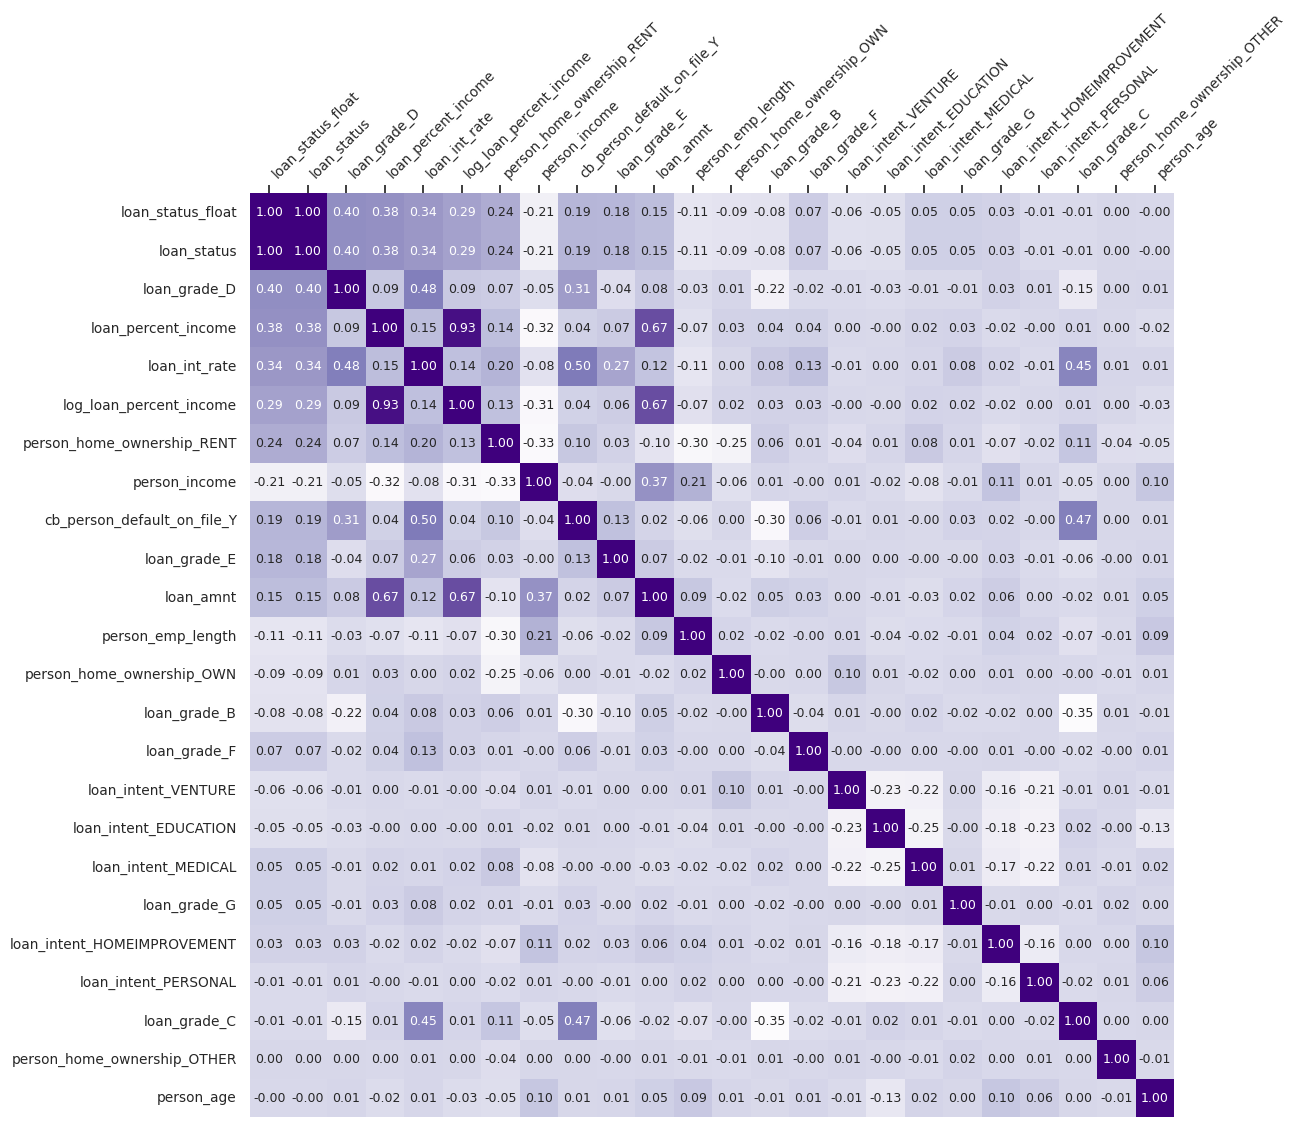

In [119]:
# Correlation heatmap sorted by loan_status
k = 25
cols = corrmat['loan_status_float'].abs().sort_values(ascending=False).index[:k]

plt.figure(figsize=(12, 12))
sns.set(font_scale=0.9)
hm = sns.heatmap(corrmat.loc[cols, cols], cbar=False, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 9},
                 yticklabels=cols.values, xticklabels=cols.values, cmap="Purples")
hm.xaxis.tick_top()
plt.xticks(rotation=45, ha='left')
plt.show()

### Randomforest Classification

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_val, y_train, y_val = train_test_split(feature_tf, target, test_size=0.2, random_state=2410)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((46076, 22), (11520, 22), (46076, 1), (11520, 1))

In [121]:
# randomforest model
randomforest = RandomForestClassifier(random_state=2410, n_jobs=-1) #class_weight='balanced'
rf_model = randomforest.fit(X_train, y_train)

rf_train_proba = rf_model.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, rf_train_proba)
train_roc_auc = auc(train_fpr, train_tpr)

rf_val_proba = rf_model.predict_proba(X_val)[:, 1]
val_fpr, val_tpr, thresholds = roc_curve(y_val, rf_val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

print(train_roc_auc, val_roc_auc)
# 1.0 0.9358221892467888 - overfitting

0.9999999866921 0.9343492573229548


In [122]:
# plot_roc_curves
def plot_roc_curves(y_val, y_val_proba, y_train, y_train_proba):

    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    val_roc_auc = auc(fpr, tpr)

    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba)
    train_roc_auc = auc(fpr_train, tpr_train)

    plt.figure(figsize=(4, 3))
    plt.plot(fpr_train, tpr_train, label='ROC curve (train, area = %0.2f)' % train_roc_auc)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % val_roc_auc)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print("AUC of train:", train_roc_auc)
    print("AUC:", val_roc_auc)

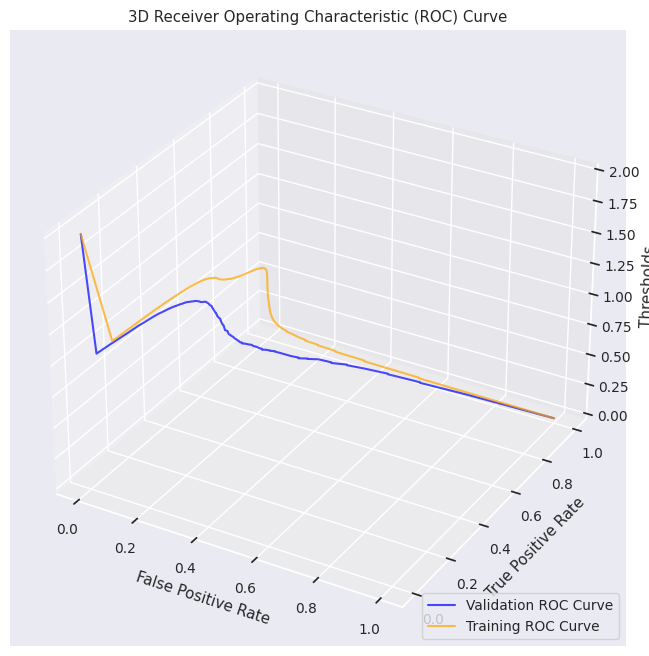

In [123]:
def plot_3d_roc_curve(y_val, rf_val_proba, y_train, rf_train_proba):
    # Compute ROC curve for validation data
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, rf_val_proba)
    
    # Compute ROC curve for training data
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf_train_proba)

    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the ROC curves in 3D
    ax.plot(fpr_val, tpr_val, thresholds_val, color='blue', label='Validation ROC Curve', alpha=0.7)
    ax.plot(fpr_train, tpr_train, thresholds_train, color='orange', label='Training ROC Curve', alpha=0.7)

    # Set labels
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_zlabel('Thresholds')
    ax.set_title('3D Receiver Operating Characteristic (ROC) Curve')

    # Add legend
    ax.legend(loc='lower right')

    # Show the plot
    plt.show()

# Example usage
plot_3d_roc_curve(y_val, rf_val_proba, y_train, rf_train_proba)

In [124]:
# GridSearchCV for parameter optimization
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [1000], 
              'max_depth': [20], 
              'min_samples_split': [15]
             }

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=2410, n_jobs=-1), 
                           param_grid=param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


{'max_depth': 20, 'min_samples_split': 15, 'n_estimators': 1000}
Best score:  0.9388348252047143


In [125]:
randomforest = RandomForestClassifier(random_state=2410, n_jobs=-1, max_depth=20, 
                                      min_samples_split=15, n_estimators=1000)

rf_op_model = randomforest.fit(X_train, y_train)

rf_op_train_proba = rf_op_model.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, rf_op_train_proba)
train_roc_auc = auc(train_fpr, train_tpr)

rf_op_val_proba = rf_op_model.predict_proba(X_val)[:, 1]
val_fpr, val_tpr, thresholds = roc_curve(y_val, rf_op_val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

print(train_roc_auc, val_roc_auc)

0.9906090921284055 0.9416918038570609


In [126]:
def plot_roc_curves_3d(y_val, rf_op_val_proba, y_train, rf_op_train_proba):
    # Compute ROC curve for validation data
    fpr_val, tpr_val, _ = roc_curve(y_val, rf_op_val_proba)
    roc_auc_val = auc(fpr_val, tpr_val)

    # Compute ROC curve for training data
    fpr_train, tpr_train, _ = roc_curve(y_train, rf_op_train_proba)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Create a 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Set axes
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.set_zlabel('Model', fontsize=12)

    # Plotting the ROC curves
    ax.plot(fpr_val, tpr_val, zs=1, zdir='z', label='Validation ROC curve (area = {:.2f})'.format(roc_auc_val), color='blue')
    ax.plot(fpr_train, tpr_train, zs=0, zdir='z', label='Training ROC curve (area = {:.2f})'.format(roc_auc_train), color='orange')

    # Create a legend
    ax.legend(loc='lower right')

    # Set title
    ax.set_title('3D Receiver Operating Characteristic (ROC) Curves', fontsize=15)

    # Show the plot
    plt.show()

#### 2. lightgbm

In [127]:
# model_light gradient boosting
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=2410, verbose=-1)
lgb_model.fit(X_train, y_train)

lgb_train_proba = lgb_model.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, lgb_train_proba)
train_roc_auc = auc(train_fpr, train_tpr)

lgb_val_proba = lgb_model.predict_proba(X_val)[:, 1]
val_fpr, val_tpr, thresholds = roc_curve(y_val, lgb_val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

print(train_roc_auc, val_roc_auc)

0.9759932498528763 0.9564929749610342


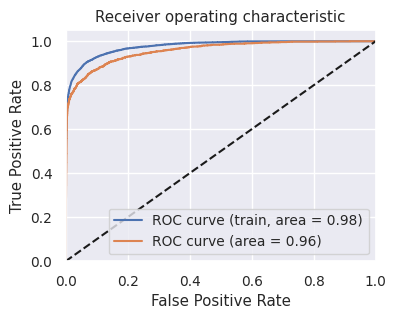

AUC of train: 0.9759932498528763
AUC: 0.9564929749610342


In [128]:
# roc_curves for lgb_model
plot_roc_curves(y_val, lgb_val_proba, y_train, lgb_train_proba)

In [129]:
# parameter optimization
from scipy.stats import randint
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [223],            
              'learning_rate': [0.06093326684538768],      
              'max_depth': [12],                
              'min_child_samples': [37]}

model = lgb.LGBMClassifier(random_state=2410, verbose=-1, n_jobs=4)

Randomized_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='roc_auc')
Randomized_search.fit(X_train, y_train)

print("The best hyperparameters are ", Randomized_search.best_params_)
print("Best score: ", Randomized_search.best_score_)


The best hyperparameters are  {'n_estimators': 223, 'min_child_samples': 37, 'max_depth': 12, 'learning_rate': 0.06093326684538768}
Best score:  0.9578507420098245


In [130]:
# lgb_model with optimized parameter
lgb_op_model = lgb.LGBMClassifier(random_state=2410, verbose=-1, n_jobs=4, 
                                  n_estimators = 223, learning_rate = 0.06093326684538768, 
                                  max_depth = 12, min_child_samples = 37)
lgb_op_model.fit(X_train, y_train)

lgb_op_train_proba = lgb_op_model.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, lgb_op_train_proba)
train_roc_auc = auc(train_fpr, train_tpr)

lgb_op_val_proba = lgb_op_model.predict_proba(X_val)[:, 1]
val_fpr, val_tpr, thresholds = roc_curve(y_val, lgb_op_val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

print(train_roc_auc, val_roc_auc)

0.978778106641336 0.9562871917190067


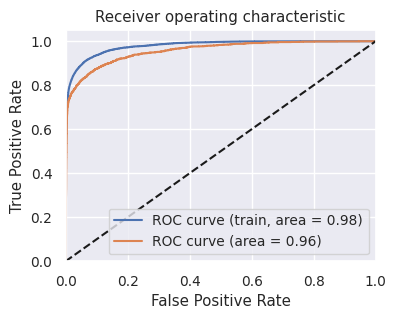

AUC of train: 0.978778106641336
AUC: 0.9562871917190067


In [131]:
# roc_curves for lgb_op_model
plot_roc_curves(y_val, lgb_op_val_proba, y_train, lgb_op_train_proba)

### 3. catboost

In [132]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(random_state = 2410, verbose=0)
cat_model.fit(X_train, y_train)

cat_train_proba = cat_model.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, cat_train_proba)
train_roc_auc = auc(train_fpr, train_tpr)

cat_val_proba = cat_model.predict_proba(X_val)[:, 1]
val_fpr, val_tpr, thresholds = roc_curve(y_val, cat_val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

print(train_roc_auc, val_roc_auc)

0.9760710934635682 0.9571443399992695


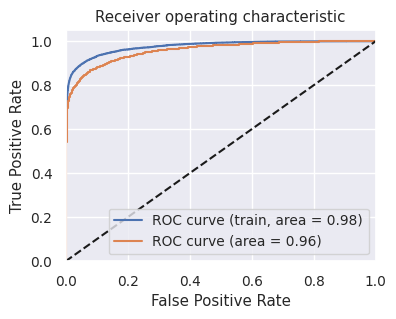

AUC of train: 0.9760710934635682
AUC: 0.9571443399992695


In [133]:
# roc_curves for cat_model
plot_roc_curves(y_val, cat_val_proba, y_train, cat_train_proba)

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {'iterations': [1000], 
              'learning_rate': [0.1],
              'depth': [5],
              'l2_leaf_reg': [8]
             }

model = CatBoostClassifier(random_state=2410, verbose=0)

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("The best hyperparameters are ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

The best hyperparameters are  {'depth': 5, 'iterations': 1000, 'l2_leaf_reg': 8, 'learning_rate': 0.1}
Best score:  0.9563160405415427


In [135]:
# cat_model with optimized parameter

cat_op_model = CatBoostClassifier(random_state = 2410, verbose=0, 
                                  iterations = 1000, learning_rate = 0.1, 
                                  depth = 5, l2_leaf_reg = 8)
cat_op_model.fit(X_train, y_train)

cat_op_train_proba = cat_op_model.predict_proba(X_train)[:, 1]
train_fpr, train_tpr, thresholds = roc_curve(y_train, cat_op_train_proba)
train_roc_auc = auc(train_fpr, train_tpr)

cat_op_val_proba = cat_op_model.predict_proba(X_val)[:, 1]
val_fpr, val_tpr, thresholds = roc_curve(y_val, cat_op_val_proba)
val_roc_auc = auc(val_fpr, val_tpr)

print(train_roc_auc, val_roc_auc)

0.9774849437745976 0.958933620590452


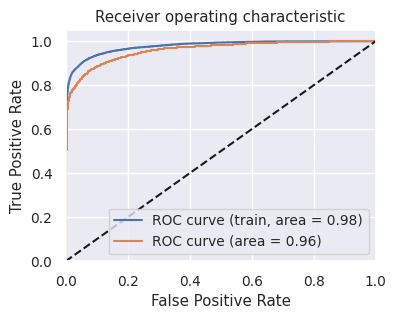

AUC of train: 0.9774849437745976
AUC: 0.958933620590452


In [136]:
# roc_curves for cat_op_model
plot_roc_curves(y_val, cat_op_val_proba, y_train, cat_op_train_proba)

# All Score submission

In [137]:
test_proba = (lgb_model.predict_proba(test_tf)[:,1]*1/4 + 
              lgb_op_model.predict_proba(test_tf)[:,1]*1/4 +
              cat_model.predict_proba(test_tf)[:,1]*1/4 + 
              cat_op_model.predict_proba(test_tf)[:,1]*1/4)
test_proba[:10]

array([0.99572243, 0.01790506, 0.53609829, 0.01190388, 0.08837677,
       0.94836571, 0.00151879, 0.00954885, 0.26092331, 0.00969242])

In [138]:
submission = pd.DataFrame({'id': test_df.id, 'loan_status': test_proba})
print(submission.shape)
submission.head()

(39098, 2)


,id,loan_status
0,58645,0.995722
1,58646,0.017905
2,58647,0.536098
3,58648,0.011904
4,58649,0.088377
